<a href="https://colab.research.google.com/github/04kaushal/DATA_X_Graph_neural_network/blob/main/GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from sklearn.metrics import silhouette_score

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Assignments/Data X 2/lat_long.csv')

In [15]:
df.head()

,Id,latitude,longitude
0,0,87.333294,144.484409
1,1,-22.605420,143.376342
2,2,-43.531545,-78.595627
3,3,-50.787744,-8.422739
4,4,-49.270064,-62.172244


In [16]:
df.dropna(axis=0,how='any',subset=['latitude','longitude'],inplace=True)

In [17]:
# Variable with the Longitude and Latitude
X=df.loc[:,['Id','latitude','longitude']]
X.head(10)

,Id,latitude,longitude
0,0,87.333294,144.484409
1,1,-22.605420,143.376342
2,2,-43.531545,-78.595627
3,3,-50.787744,-8.422739
4,4,-49.270064,-62.172244
5,5,10.554866,-49.968744
6,6,62.845127,82.463567
7,7,-22.700131,135.919554
8,8,-11.006478,-95.394614
9,9,-62.240639,-70.646129


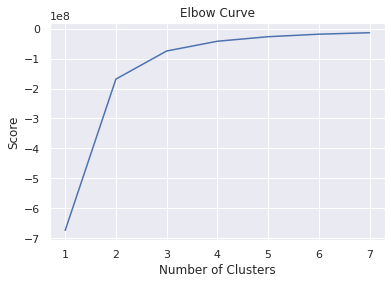

In [18]:
K_clusters = range(1,8)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['latitude']]
X_axis = df[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [36]:
'''
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(Y_axis)
  labels = kmeans.labels_
  sil.append(silhouette_score(Y_axis, labels, metric = 'euclidean'))

sil'''

"\nfrom sklearn.metrics import silhouette_score\n\nsil = []\nkmax = 10\n\n# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2\nfor k in range(2, kmax+1):\n  kmeans = KMeans(n_clusters = k).fit(Y_axis)\n  labels = kmeans.labels_\n  sil.append(silhouette_score(Y_axis, labels, metric = 'euclidean'))\n\nsil"

One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10), and for each value of k calculate the Sum of Squared Errors (SSE).
When K increases, the centroids are closer to the clusters centroids. The improvements will decline rapidly at some point, creating the elbow shape. That is the optimal value for K.

In [19]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_number'] = kmeans.fit_predict(X[X.columns[1:3]])
centroid = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)


,Id,latitude,longitude,cluster_number
0,0,87.333294,144.484409,2
1,1,-22.605420,143.376342,2
2,2,-43.531545,-78.595627,1
3,3,-50.787744,-8.422739,3
4,4,-49.270064,-62.172244,3
5,5,10.554866,-49.968744,0
6,6,62.845127,82.463567,2
7,7,-22.700131,135.919554,2
8,8,-11.006478,-95.394614,1
9,9,-62.240639,-70.646129,3


In [20]:
centroid

array([[  48.5298397 ,    1.91668451],
       [   0.84531186, -125.29795392],
       [  -0.88291533,  124.5471999 ],
       [ -48.57139961,   -3.1956001 ]])

In [22]:
centroid_labels = [centroid[i] for i in labels]
centroid_labels

[array([ -0.88291533, 124.5471999 ]),
 array([ -0.88291533, 124.5471999 ]),
 array([   0.84531186, -125.29795392]),
 array([-48.57139961,  -3.1956001 ]),
 array([-48.57139961,  -3.1956001 ]),
 array([48.5298397 ,  1.91668451]),
 array([ -0.88291533, 124.5471999 ]),
 array([ -0.88291533, 124.5471999 ]),
 array([   0.84531186, -125.29795392]),
 array([-48.57139961,  -3.1956001 ]),
 array([ -0.88291533, 124.5471999 ]),
 array([48.5298397 ,  1.91668451]),
 array([-48.57139961,  -3.1956001 ]),
 array([48.5298397 ,  1.91668451]),
 array([ -0.88291533, 124.5471999 ]),
 array([48.5298397 ,  1.91668451]),
 array([ -0.88291533, 124.5471999 ]),
 array([ -0.88291533, 124.5471999 ]),
 array([ -0.88291533, 124.5471999 ]),
 array([ -0.88291533, 124.5471999 ]),
 array([ -0.88291533, 124.5471999 ]),
 array([   0.84531186, -125.29795392]),
 array([   0.84531186, -125.29795392]),
 array([ -0.88291533, 124.5471999 ]),
 array([   0.84531186, -125.29795392]),
 array([ -0.88291533, 124.5471999 ]),
 array([ -

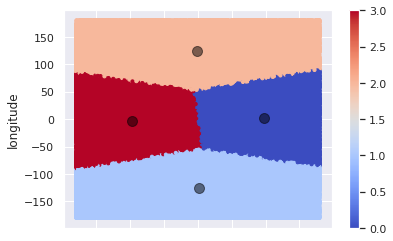

In [25]:
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=10, cmap='coolwarm')
plt.scatter(centroid[:, 0], centroid[:, 1], c='black', s=100, alpha=0.5)

In [36]:
X['centroid'] = (X['latitude']+X['longitude'])/2

In [37]:
X.head()

,Id,latitude,longitude,cluster_number,centroid
0,0,87.333294,144.484409,2,115.908852
1,1,-22.605420,143.376342,2,60.385461
2,2,-43.531545,-78.595627,1,-61.063586
3,3,-50.787744,-8.422739,3,-29.605241
4,4,-49.270064,-62.172244,3,-55.721154


In [38]:
X.to_csv('Geo_data.csv')

In [4]:
!pip install neo4j-driver==1.6.2

     |████████████████████████████████| 191 kB 24.0 MB/s 
  Created wheel for neo4j-driver: filename=neo4j_driver-1.6.2-cp37-cp37m-linux_x86_64.whl size=521148 sha256=de932bf0f8b6075363793dc5e73e996d3790a18ac5e4aa59c094c4b610f2b16e
  Stored in directory: /root/.cache/pip/wheels/fc/37/2c/7080315b0c060e9264c96574e9f50db5d4815e52adc86bb935
  Created wheel for neotime: filename=neotime-1.0.0-py3-none-any.whl size=14714 sha256=629a9d6e3f1374561203cef17b2679d901f6acbaa5144b29547b2c44062c5240
  Stored in directory: /root/.cache/pip/wheels/6e/53/79/7045b9d082d0671e91faeebdc5f8bd7d4358a9a7b9df8b302d
Successfully built neo4j-driver neotime


In [7]:
!pip install dgl -f https://data.dgl.ai/wheels/repo.html

Looking in links: https://data.dgl.ai/wheels/repo.html
     |████████████████████████████████| 5.7 MB 10.7 MB/s 


In [39]:
import dgl
from dgl.data import DGLDataset

In [40]:
import dgl
from dgl.data import DGLDataset
import torch
import os
properties = pd.read_csv('/content/Geo_data.csv')
edges = pd.read_csv('/content/Geo_data.csv')
edges.head()
properties.head()

class SyntheticDataset(DGLDataset):
    def _init_(self):
        super()._init_(name='synthetic')

    def process(self):
        edges = pd.read_csv('/content/Geo_data.csv')
        properties = pd.read_csv('/content/Geo_data.csv')
        self.graphs = []
        self.labels = []


        label_dict = {}
        num_nodes_dict = {}
        for _, row in properties.iterrows():
            label_dict[row['Id']] = row['Id']

            num_nodes_dict[row['Id']] = 2

        # For the edges, first group the table by graph IDs.
        edges_group = edges.groupby('Id')

        # For each graph ID...
        for graph_id in edges_group.groups:
            # Find the edges as well as the number of nodes and its label.
            edges_of_id = edges_group.get_group(graph_id)
            src = edges_of_id['latitude'].to_numpy()
            dst = edges_of_id['longitude'].to_numpy()
            num_nodes = num_nodes_dict[graph_id]
            label = label_dict[graph_id]

            # Create a graph and add it to the list of graphs and labels.
            g = dgl.graph((src, dst), num_nodes=1000)
            self.graphs.append(g)
            self.labels.append(label)

        # Convert the label list to tensor for saving.
        self.labels = torch.LongTensor(self.labels)

    def _getitem_(self, i):
        return self.graphs[i], self.labels[i]

    def _len_(self):
        return len(self.graphs)

dataset = SyntheticDataset()
graph, label = dataset[0]
print(graph, label)

TypeError: ignored

Whole idea was to plot the graph her eas followed in https://docs.dgl.ai/en/0.6.x/new-tutorial/6_load_data.html

Next up i would have used learning from this website - > https://docs.dgl.ai/en/0.6.x/tutorials/models/1_gnn/6_line_graph.html